## Importing  the libraries

In [ ]:
#Essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

#Machine learning 
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

#Evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

## Importing the dataset

In [ ]:
train = pd.read_csv("/content/pendigits-tra.csv")
test = pd.read_csv("/content/pendigits-tes.csv")
train.head()

,47,100,27,81,57,37,26,0,0.1,23,56,53,100.1,90,40,98,8
0,0,89,27,100,42,75,29,45,15,15,37,0,69,2,100,6,2
1,0,57,31,68,72,90,100,100,76,75,50,51,28,25,16,0,1
2,0,100,7,92,5,68,19,45,86,34,100,45,74,23,67,0,4
3,0,67,49,83,100,100,81,80,60,60,40,40,33,20,47,0,1
4,100,100,88,99,49,74,17,47,0,16,37,0,73,16,20,20,6


In [ ]:
test.head()

,88,92,2,99,16,66,94,37,70,0,0.1,24,42,65,100,100.1,8
0,80,100,18,98,60,66,100,29,42,0,0,23,42,61,56,98,8
1,0,94,9,57,20,19,7,0,20,36,70,68,100,100,18,92,8
2,95,82,71,100,27,77,77,73,100,80,93,42,56,13,0,0,9
3,68,100,6,88,47,75,87,82,85,56,100,29,75,6,0,0,9
4,70,100,100,97,70,81,45,65,30,49,20,33,0,16,0,0,1


## splitting the dataset into features and target

In [ ]:
x_train = train.iloc[:,:-1].values
y_train = train.iloc[:,-1].values
x_test = test.iloc[:,:-1].values
y_test = test.iloc[:,-1].values
print(x_train)
print(x_test)
print(y_train)
print(y_test)

[[  0  89  27 ...   2 100   6]
 [  0  57  31 ...  25  16   0]
 [  0 100   7 ...  23  67   0]
 ...
 [100  98  60 ...   0   0   5]
 [ 59  65  91 ...   1 100   0]
 [  0  78  29 ...  36 100  40]]
[[ 80 100  18 ...  61  56  98]
 [  0  94   9 ... 100  18  92]
 [ 95  82  71 ...  13   0   0]
 ...
 [ 56 100  27 ...  93  38  93]
 [ 19 100   0 ...  97  10  81]
 [ 38 100  37 ...  26  65   0]]
[2 1 4 ... 5 1 7]
[8 8 9 ... 0 0 4]


## Evaluation function

In [ ]:
def evaluation(y_test,y_pred,clf):
  acc = accuracy_score(y_test,y_pred)
  cm = confusion_matrix(y_test,y_pred)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
  disp.plot()
  return acc

## Decision tree

0.9207892479267944


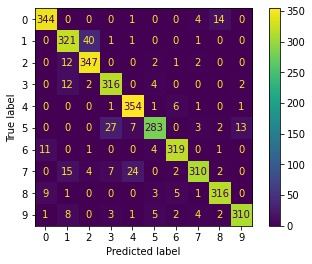

In [ ]:
dt = DecisionTreeClassifier(random_state =0)
dt.fit(x_train,y_train)
y_dt = dt.predict(x_test)
acc_dt = evaluation(y_test,y_dt,dt)
print(acc_dt)

## Bagging 

**A)  Bagging for SVM**


0.9785530454675436


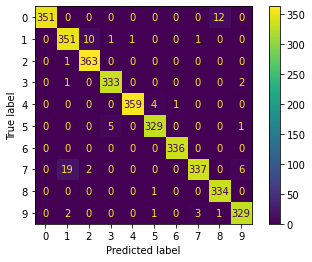

In [ ]:
bagging_svm = BaggingClassifier(SVC(), random_state=0)
Bag_svm=bagging_svm.fit(x_train, y_train)
y_pred_svm = Bag_svm.predict(x_test)
acc_svm = evaluation(y_test,y_pred_svm,Bag_svm)
print(acc_svm)

 **Bagging for Decision Tree**

0.9482413497283386


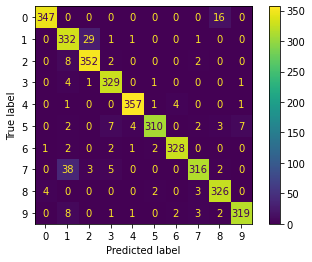

In [ ]:
bagging_clf_DT = BaggingClassifier(
    DecisionTreeClassifier(), random_state=0)
Bag_DecisionTree=bagging_clf_DT.fit(x_train, y_train)
y_pred_DT = Bag_DecisionTree.predict(x_test)
acc_DT = evaluation(y_test,y_pred_DT,Bag_DecisionTree)
print(acc_DT)

 **utilize majority voting**

In [ ]:
# group / ensemble of models
estimator = []
estimator.append(('SVC', bagging_svm))
estimator.append(('DTC', bagging_clf_DT))
  
# Voting Classifier with hard voting
vot_hard = VotingClassifier(estimators = estimator, voting ='hard')
vot_hard.fit(x_train, y_train)
y_pred_svm = vot_hard.predict(x_test)
  
# using accuracy_score metric to predict accuracy
score = accuracy_score(y_test, y_pred_svm)
print("Hard Voting Score " , score)
  
# Voting Classifier with soft voting
vot_soft = VotingClassifier(estimators = estimator, voting ='soft')
vot_soft.fit(x_train, y_train)
y_pred_DT = vot_soft.predict(x_test)
  
# using accuracy_score
score = accuracy_score(y_test, y_pred_DT)
print("Soft Voting Score ", score)

Hard Voting Score  0.9602516442665141
Soft Voting Score  0.976551329711181


b)

[0.9556762939662568, 0.9591078066914498, 0.9585358879039176, 0.9585358879039176, 0.9588218472976837]


<function matplotlib.pyplot.show>

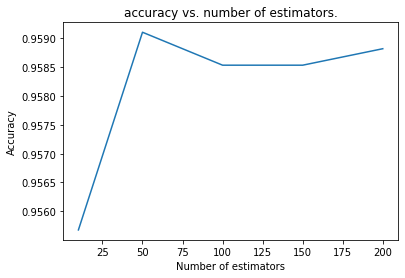

In [ ]:
Accuracy=[]
N_Est=[10,50,100,150,200]
for i in N_Est:

  tree = bagging_clf_DT
  estimator = BaggingClassifier(tree, n_estimators=i, random_state=2022)
  estimator.fit(x_train, y_train)
  y_pred = estimator.predict(x_test)
  report = accuracy_score(y_test, y_pred)
  Accuracy.append(report)
print(Accuracy)
plt.plot(N_Est,Accuracy)
plt.title('accuracy vs. number of estimators')
plt.xlabel("Number of estimators")
plt.ylabel("Accuracy")
plt.show

From the previous figure ,the best number of estimators = 50

##Gradient boosting

In [ ]:
accuracies = []
for i in [10,50,100,200]:
  for j in [0.1,0.3,0.5,0.7]:
    gradient = GradientBoostingClassifier(n_estimators=i,learning_rate=j)
    gradient.fit(x_train,y_train)
    y_gb = gradient.predict(x_test)
    acc_gb = accuracy_score(y_test,y_gb)
    accuracies.append(acc_gb)
    print("Accuracy of gradient boosting of no. of estimator" ,i, "and learning rate" ,j,": ",acc_gb)
print("argmax: ", np.argmax(accuracies))

Accuracy of gradient boosting of no. of estimator 10 and learning rate 0.1 :  0.872748069774092
Accuracy of gradient boosting of no. of estimator 10 and learning rate 0.3 :  0.929368029739777
Accuracy of gradient boosting of no. of estimator 10 and learning rate 0.5 :  0.9433800400343151
Accuracy of gradient boosting of no. of estimator 10 and learning rate 0.7 :  0.9433800400343151
Accuracy of gradient boosting of no. of estimator 50 and learning rate 0.1 :  0.9499571060909351
Accuracy of gradient boosting of no. of estimator 50 and learning rate 0.3 :  0.9636831569917071
Accuracy of gradient boosting of no. of estimator 50 and learning rate 0.5 :  0.7354875607663712
Accuracy of gradient boosting of no. of estimator 50 and learning rate 0.7 :  0.9559622533600228
Accuracy of gradient boosting of no. of estimator 100 and learning rate 0.1 :  0.9619674006291107
Accuracy of gradient boosting of no. of estimator 100 and learning rate 0.3 :  0.9645410351730054
Accuracy of gradient boosting 

0.9656848727480698


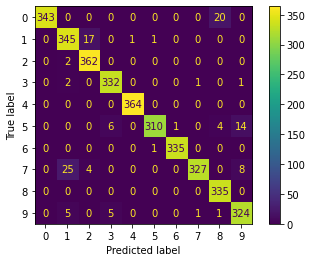

In [ ]:
gradient = GradientBoostingClassifier(n_estimators=200,learning_rate=0.1)
gradient.fit(x_train,y_train)
y_gb = gradient.predict(x_test)
acc_gb = evaluation(y_test,y_gb,gradient)
print(acc_gb)

## XGBoost

0.9648269945667716


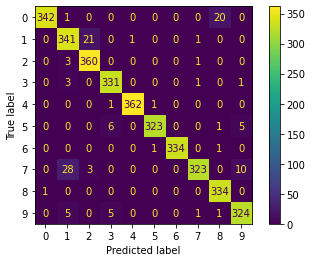

In [ ]:
xg = XGBClassifier(n_estimators=200,learning_rate=0.1)
xg.fit(x_train, y_train)
y_xg = xg.predict(x_test)
acc_xg = evaluation(y_test,y_xg,xg)
print(acc_xg)